
## ***Plant disease detection***

----

### In this project, we aim to develop a plant disease detection system using CNNs. By leveraging the power of deep learning, we can train a model to accurately classify images of plants into healthy or diseased categories based on visual symptoms. The model will learn to extract relevant features from the images and make predictions, enabling early detection and targeted treatment of plant diseases.

### Importing Libraries

In [1]:
# Import necessary librariesr for data preprocessing and exploration
import pandas as pd
import numpy as np
import cv2 as cv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
# Importing ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Importing train_test_split for splitting the data into training and validation sets
from sklearn.model_selection import train_test_split
# Importing train_test_split for splitting the data into training and validation sets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import binary_crossentropy

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Reading and Exploring the Data

In [2]:
data_dir="/kaggle/input/plantvillage-dataset/color"

In [3]:
class_name = os.listdir(data_dir)
image_paths = []
labels = []

for class_name in class_name:
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    for image_file in image_files:
        image_path = os.path.join(class_path, image_file)
        image_paths.append(image_path)
        labels.append(class_name)

df = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [4]:
df.head(10)

,image_path,label
0,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
1,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
2,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
3,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
4,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
5,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
6,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
7,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
8,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight
9,/kaggle/input/plantvillage-dataset/color/Tomat...,Tomato___Late_blight


In [5]:
df.tail()

,image_path,label
54300,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54301,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54302,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54303,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy
54304,/kaggle/input/plantvillage-dataset/color/Corn_...,Corn_(maize)___healthy


In [6]:
# number of labels in DataFrame
print("Number of calsses we have:- ",df['label'].nunique())

Number of calsses we have:-  38


In [7]:
# names of labels in DataFrame
class_names=np.unique(df['label'])
print('Classes we have:- ', class_names)

Classes we have:-  ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_S

Text(0.5, 1.0, 'Class Distribution')

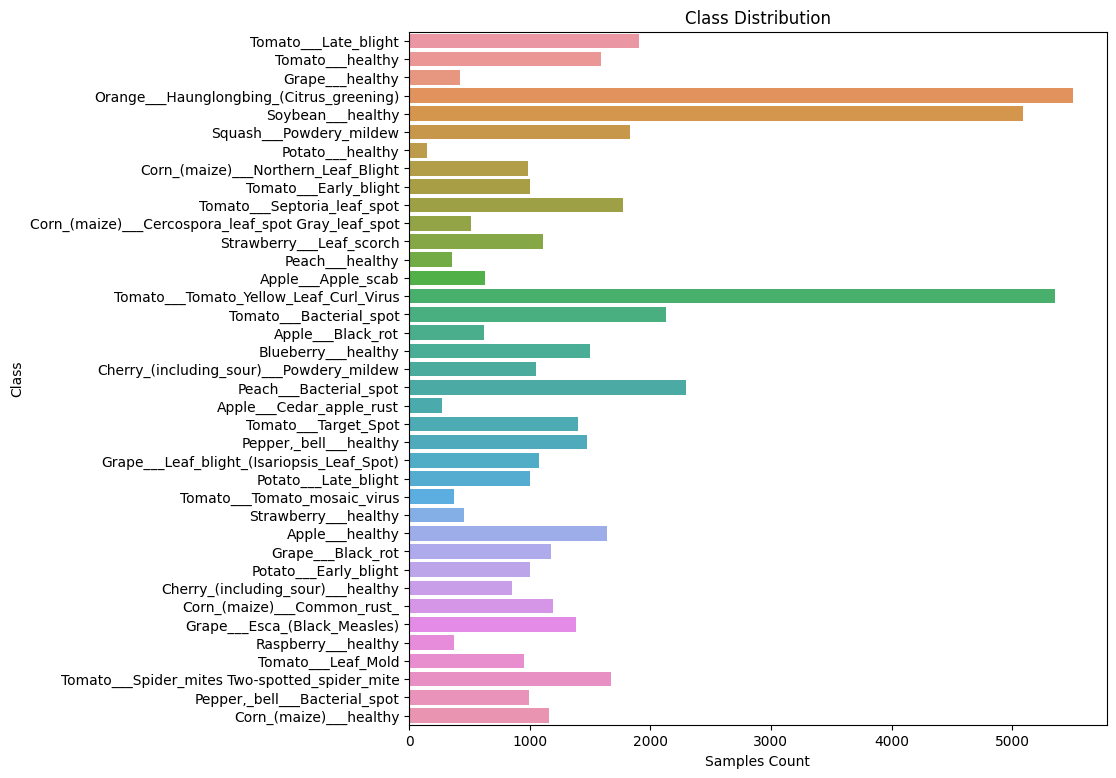

In [8]:
#this fig shows the distibution of classes
fig=plt.figure(figsize=(9,9))
sns.countplot(y='label',data=df)
plt.xlabel('Samples Count')
plt.ylabel('Class')
plt.title('Class Distribution')

#### noticed from the figure that  ***Class [Orange_haunglongbing_(Citrus_greening)]*** has the ***largest number*** of samples.


In [9]:
#Convert the class labels in the 'label' column of the DataFrame df from their original labels to numerical values.
# Create a dictionary that maps unique class labels to numicical values
class_labels_dict = {class_label: idx for idx, class_label in enumerate(np.unique(df['label']))}
#Map the class labels in the 'label' column of the DataFrame to it's corresponding numicical value
df['label'] = df['label'].map(class_labels_dict)

### Split DataFrame to training , validation ,and testing sets

In [10]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df, labels, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [11]:
# Print the number of samples in each set
print("Number of samples in training set: ", len(train_data))
print("Number of samples in validation set:", len(val_data))
print("Number of samples in testing set: ", len(test_data))

Number of samples in training set:  34755
Number of samples in validation set: 8689
Number of samples in testing set:  10861


In [12]:
print(train_data['label'].unique())

[35 24  8  9  5 15  4 11 33 12 19 27 32 13 26  1 16  3 21 14 28 30  6 34
 29 25 31 20  0 10 37 17 18 23 36  7  2 22]


In [13]:
#define the image generator for performing data augmentation on data during training
train_datagen = ImageDataGenerator(
          rescale = 1./255,
          rotation_range = 30,
          width_shift_range = 0.2,
          height_shift_range = 0.2,
          zoom_range = 0.2,
          horizontal_flip = True,
          fill_mode = 'nearest'
)

batch_size = 40
target_size =(224, 224) #(height,width)
train_data['label'] = train_data['label'].astype(str)
val_data['label'] = val_data['label'].astype(str)


#define the training set
train_data = train_datagen.flow_from_dataframe(
    train_data,
    x_col='image_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    suset = 'training'
)

Found 34755 validated image filenames belonging to 38 classes.


In [14]:
#define the generator without augmentation for the validation data
validation_datagen = ImageDataGenerator(rescale=1./255)
val_data = validation_datagen.flow_from_dataframe(
    val_data,
    x_col='image_path',
    y_col='label',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    suset = 'training'
)

Found 8689 validated image filenames belonging to 38 classes.


### Model architecture and training

In [15]:
# Define the model architecture
model = Sequential() # creates a new sequential model object

# first conovolutional layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(224, 224, 3))) # add a 2D conovolutional layer
model.add(MaxPooling2D(pool_size =(2,2)))   # add a 2d max pool of size 2x2
model.add(Dropout(0.25))    # drop out ayer that drops randomly 25% of units in pre layer to avoid overfitting

# second conovlutional layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

# third conovlutional layer
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) # flatten the layer to 1D array
model.add(Dense(1568,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(38, activation = ('softmax'))) #we used softmax function because it's multi classification

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [16]:
# Define callbacks for early stopping and learning rate reduction
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=3)  # stop if validation loss doesn't improve for 3 epochs
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [17]:
# Compile the model
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(train_data, epochs=20, validation_data=val_data,  callbacks=callbacks)

Epoch 1/20


2023-11-06 14:47:52.049734: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


869/869 [==============================] - 663s 750ms/step - loss: 2.4573 - accuracy: 0.3404 - val_loss: 1.6328 - val_accuracy: 0.5284 - lr: 0.0010
Epoch 2/20
869/869 [==============================] - 402s 463ms/step - loss: 1.4191 - accuracy: 0.5990 - val_loss: 1.0524 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 3/20
869/869 [==============================] - 407s 469ms/step - loss: 1.0948 - accuracy: 0.7005 - val_loss: 0.9313 - val_accuracy: 0.7610 - lr: 0.0010
Epoch 4/20
869/869 [==============================] - 401s 461ms/step - loss: 1.1214 - accuracy: 0.7569 - val_loss: 0.9182 - val_accuracy: 0.8185 - lr: 0.0010
Epoch 5/20
869/869 [==============================] - 417s 480ms/step - loss: 0.9722 - accuracy: 0.7970 - val_loss: 0.8776 - val_accuracy: 0.8282 - lr: 0.0010
Epoch 6/20
869/869 [==============================] - 429s 494ms/step - loss: 1.1119 - accuracy: 0.8252 - val_loss: 0.7934 - val_accuracy: 0.8630 - lr: 0.0010
Epoch 7/20
869/869 [==============================] - 419

### Model evaluation

In [19]:
#Evaluate the model on the val data
val_loss, val_acc = model.evaluate(val_data)

print('val accuracy:', val_acc, 'val loss:',val_loss)

218/218 [==============================] - 17s 78ms/step - loss: 1.8409 - accuracy: 0.8846
val accuracy: 0.8845666646957397 val loss: 1.8408715724945068


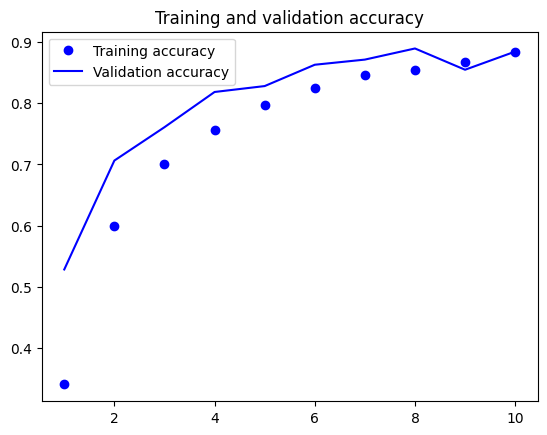

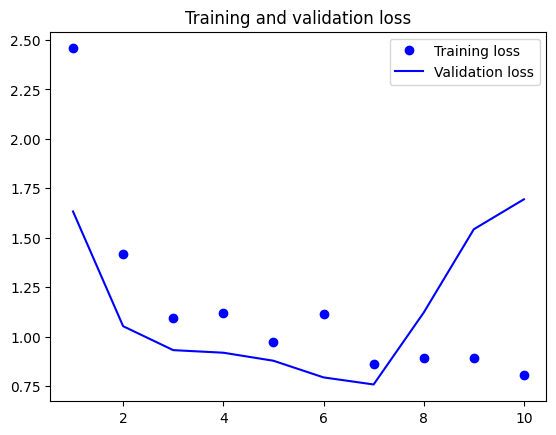

In [20]:
# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
# save the model
model.save_weights("model.h")

In [22]:
#define the generator without augmentation for the test data
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_dataframe(
    test_data,
    x_col='image_path',
    y_col=None,
    class_mode=None,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False
)

Found 10861 validated image filenames.


In [23]:
# make predictions on test data
predictions = model.predict_generator(test_data)
# Convert the predictions to class labels
predicted_labels = [class_names[np.argmax(prediction)] for prediction in predictions]

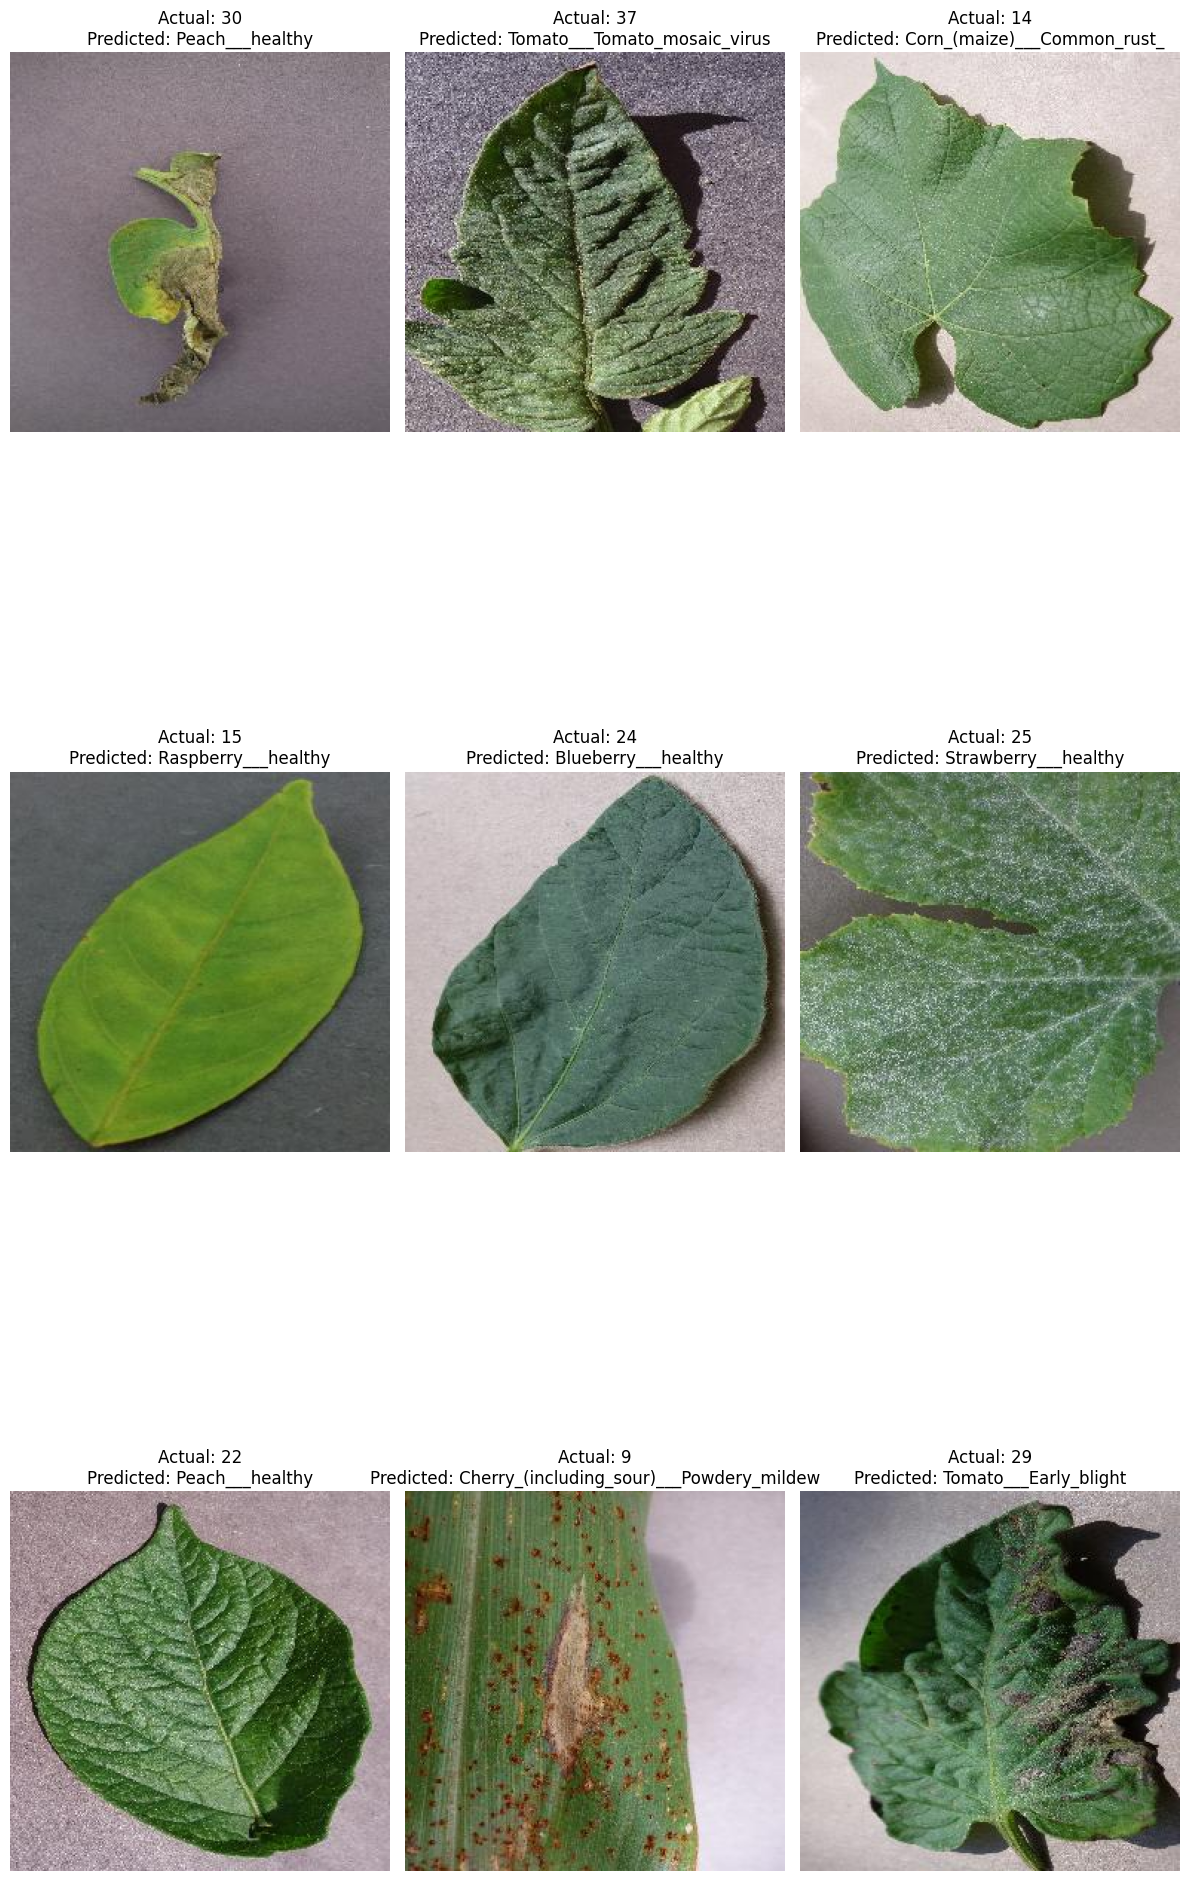

In [24]:
#Display sample images from each class with actual and predicted labels
class_names = df['label'].unique()
num_subplots = min(len(class_names), 9)
plt.figure(figsize=(12, 24))
for i in range(num_subplots):
    plt.subplot(3, 3, i+1)
    class_samples = df[df['label'] == class_names[i]].sample(1)
    image_path = class_samples['image_path'].values[0]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    #Get the actual label
    actual_label = class_names[i]
    #Get the predicted label
    predicted_label = predicted_labels[i]
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()